In earlier notebook, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
def successive_poisson(tau1, tau2, size = 1):
    '''Compute the time for arrival for two successive poison process'''
    t1 = np.random.exponential(tau1, size = size)
    t2 = np.random.exponential(tau2, size = size)
    return t1 + t2

def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1)/len(x)
    return x, y

Now, we will use our sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

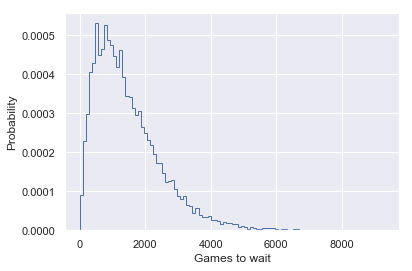

In [6]:
waiting_time = successive_poisson(764, 715, size = 10000)
_ = plt.hist(waiting_time, histtype='step', density = True, bins = 100)
_ = plt.xlabel('Games to wait')
_ = plt.ylabel('Probability')
plt.show()

from the above plot it seems that the chances of event occuring within 1000 games is np.sum(waiting_time <=1000)/len(waiting_time) = 0.3921

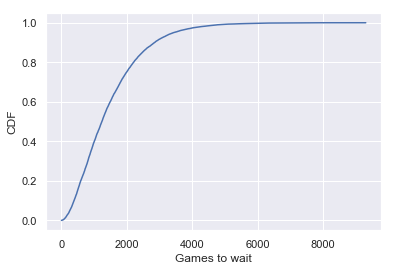

In [9]:
#plotting the ecdf
x, y = ecdf(waiting_time)
_ = plt.plot(x,y)
_ = plt.xlabel('Games to wait')
_ = plt.ylabel('CDF')
plt.show()

With the help of above plot we can deduce that around 80% of time we will see both event occuring below 2000 games.